In [1]:
# Install required libraries
!pip install pandas numpy tensorflow scikit-learn matplotlib

  Using cached MarkupSafe-2.1.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 2.0.0
    Not uninstalling markupsafe at /shared-libs/python3.9/py-core/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'MarkupSafe'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout

2024-08-20 18:38:07.128378: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-20 18:38:07.269192: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-20 18:38:07.269217: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-08-20 18:38:07.301440: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-20 18:38:08.009076: W tensorflow/stream_executor/pla

In [3]:
# Loading the IBM dataset
# Assume you have a CSV file with data containing 'Date' and 'Close' columns
df = pd.read_csv('IBM2017.csv')

In [4]:
# Converting 'Date' column to datetime format and sorting by date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

In [5]:
# Using only the 'Close' column for prediction
data = df['Close'].values.reshape(-1, 1)

In [6]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [7]:
# Creating a dataset with time windows
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

In [8]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Defining the 1D CNN model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_step, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

2024-08-20 18:38:09.167569: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-20 18:38:09.167603: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-20 18:38:09.167625: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-d6ccbe74-5722-4f84-8e54-7da9a834c88a): /proc/driver/nvidia/version does not exist
2024-08-20 18:38:09.169637: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20
18/18 [==============================] - 1s 31ms/step - loss: 0.0587 - val_loss: 0.0094
Epoch 2/20
18/18 [==============================] - 0s 18ms/step - loss: 0.0216 - val_loss: 0.0106
Epoch 3/20
18/18 [==============================] - 0s 19ms/step - loss: 0.0166 - val_loss: 0.0081
Epoch 4/20
18/18 [==============================] - 0s 19ms/step - loss: 0.0176 - val_loss: 0.0094
Epoch 5/20
18/18 [==============================] - 0s 18ms/step - loss: 0.0148 - val_loss: 0.0066
Epoch 6/20
18/18 [==============================] - 0s 18ms/step - loss: 0.0139 - val_loss: 0.0068
Epoch 7/20
18/18 [==============================] - 0s 18ms/step - loss: 0.0127 - val_loss: 0.0055
Epoch 8/20
18/18 [==============================] - 0s 18ms/step - loss: 0.0124 - val_loss: 0.0058
Epoch 9/20
18/18 [==============================] - 0s 18ms/step - loss: 0.0128 - val_loss: 0.0046
Epoch 10/20
18/18 [==============================] - 0s 18ms/step - loss: 0.0106 - val_loss: 0.0042
Epoch 11/

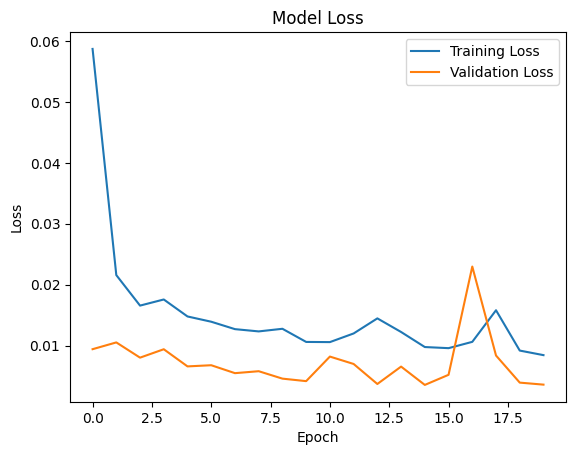

In [10]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Visualizing loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
# Evaluating the model
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))

5/5 [==============================] - 0s 3ms/step


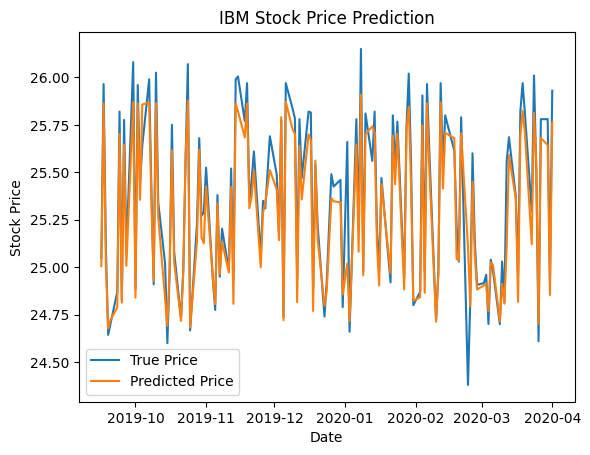

In [12]:
# Visualizing the results
plt.plot(df['Date'][-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Price')
plt.plot(df['Date'][-len(predicted_prices):], predicted_prices, label='Predicted Price')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

5/5 [==============================] - 0s 3ms/step


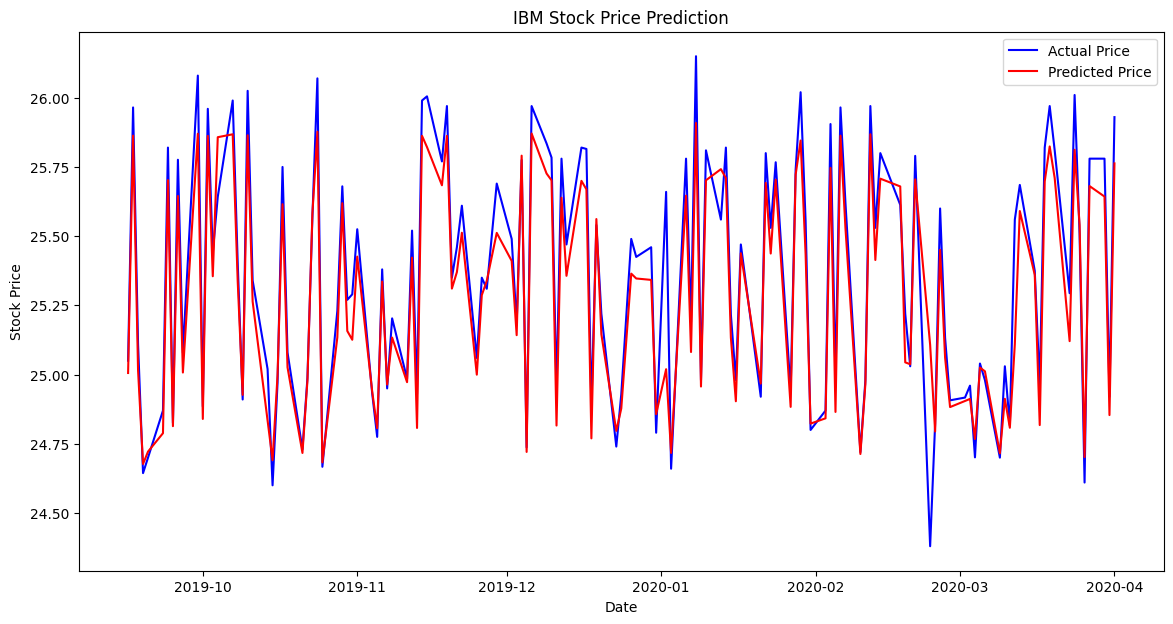

In [13]:
# Predicting the stock prices on the test set
predicted_prices = model.predict(X_test)

# Inversing the scaling to get the actual price values
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the true vs. predicted prices
plt.figure(figsize=(14,7))
plt.plot(df['Date'][-len(y_test):], actual_prices, label='Actual Price', color='blue')
plt.plot(df['Date'][-len(predicted_prices):], predicted_prices, label='Predicted Price', color='red')
plt.title('IBM Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Explanation of the Script:

    Install Required Libraries:
        Install pandas, numpy, tensorflow, scikit-learn, and matplotlib using !pip install.

    Load the Data:
        Read the IBM stock data from IBM2017.csv.

    Prepare the Time Series Data:
        Use the Close column as the target variable.

    Create Lagged Features:
        Generate lagged features to help the (1D) CNN model use past information for predictions.

    Split the Data:
        Split the data into training and test sets.

    Normalize the Features and Target:
        Normalize both the features and target variable to improve model performance.

    Reshape Data for CNN:
        Reshape the data into the format required for CNN: (samples, time steps, features).

    Define the CNN Model:
        Create a CNN model with convolutional layers, max pooling, and dense layers.

    Compile and Train the Model:
        Compile the model with an Adam optimizer and mean squared error loss function. Train the model on the training data.

    Predict Future Values:
        Use the trained model to forecast future values.

    Evaluate Performance:
        Calculate the Mean Squared Error (MSE) between actual and predicted values.

    Plot Results:
        Visualize the actual versus predicted closing prices and training loss history.

Notes:

    Ensure the file path 'IBM2017.csv' is correct and that the CSV file contains the necessary columns.
    Adjust the lags parameter based on the number of past values to include as features.
    The model architecture (number of filters, kernel size, etc.) can be adjusted based on the dataset and problem specifics.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>